1. Why do we use a validation dataset during training, and what can the performance between the validation dataset and the training set tell us?
To determine the efficiency of the network, and for a set which the set can be compared to.
2. What is the major difference between a fully-connected layer and a convolutional layer in terms of the scale of patterns they look for in their input?
A fully-connected layer is able to perform higher fucntions due to being connected to more neurons than can a convolutional layer, which is connected only to local neurons.
3. If you performed 128 convolutions with filter size 3x3 and a stride of 1 on an input that is 100x100x64 and padded the inputs, what would the output shape be of this layer?
(100-3+2x1)/1+1=100
4. Matrix A has a shape of 250x200 and matrix B has a shape of 250x100. Can you perform a matrix multiplication between A and B in that order without performing any other operations first (True or False)?
False, you cannot perform a multiplication without first performing anohter operation.
5. Matrix A has a shape of 3x5 and matrix B has a shape of 3x5. Can these two matrices be added together elementwise (True or False)?
False, the matricies must be the same shape.

In [0]:
try:
  import tflearn
except ImportError:
  !pip3 install -q tflearn
  import tflearn

In [0]:
import numpy as np
import os
from google.colab import drive
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d
from tflearn.activations import relu
from tflearn.layers.normalization import batch_normalization as bn
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical
import matplotlib.pyplot as plt

In [180]:
filter1 = np.zeros([90, 50]) # create the array
print(filter1[5, ...])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [0]:
# load in the flowers dataset
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(100, 100))

In [182]:
print(X.shape)
print(Y.shape)

(1360, 100, 100, 3)
(1360, 17)


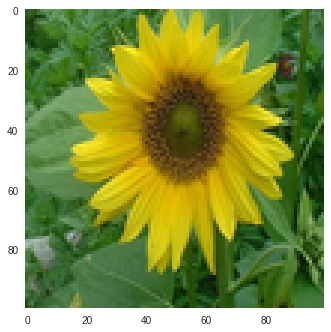

In [183]:
plt.imshow(X[500, ...])
plt.grid(False)

([array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 4.,
         2., 1., 2., 1., 4., 1., 2., 1., 2., 3., 1., 3., 4., 1., 3., 3., 1.,
         3., 3., 5., 2., 4., 4., 9., 5., 6., 3., 5., 1., 1., 2., 2.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 2., 1.,
         2., 2., 1., 2., 3., 5., 2., 6., 5., 6., 2., 3., 1., 4., 4., 4., 7.,
         4., 9., 3., 3., 5., 1., 1., 2., 3., 1., 0., 1., 1., 0., 0.]),
  array([ 7., 12., 10.,  4.,  1.,  2.,  4.,  2.,  2.,  1.,  1.,  3.,  1.,
          0.,  0.,  0.,  2.,  2.,  2.,  4.,  3.,  2.,  3.,  6.,  4.,  4.,
          1.,  2.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
          3.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([0.00784314, 0.02376951, 0.03969588, 0.05562225, 0.07154862,
        0.08747499, 0.10340136, 0.11932773, 0.1352541 , 0.15118047,
        0.16710685, 0.18303322, 0.19895959, 0.21488596, 0.23081233,
        0.2467387 , 0.26266507, 0.27859144, 0.29451781, 0.3104

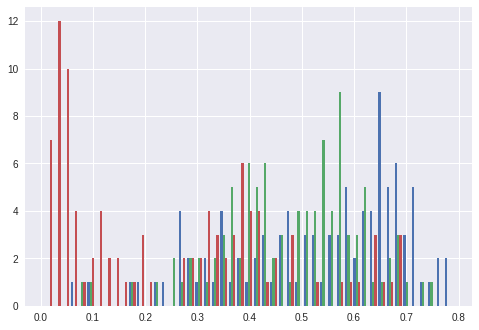

In [184]:
plt.hist(X[90, 50], bins=49)

In [0]:
X_mean = np.mean(X, 0) # get mean pixel value at every location in image
X -= X_mean

In [0]:
in_layer = tflearn.input_data(shape=[None, 100, 100, 3])

In [0]:
conv1 = conv_2d(in_layer, 64, 7, activation='relu', name='c1')

In [0]:
# 128 filters
# 3x3 filter size
# 25.25x25.25 should be size of output
conv2 = conv_2d(conv1, 128, 3, activation='relu', strides=4)

In [0]:
output_layer = fully_connected(conv2, 98, activation='softmax')

In [0]:
opt = regression(output_layer, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy')

In [0]:
model = tflearn.DNN(opt)

In [192]:
model.fit(X, # input 
          Y, # labels
          validation_set=0.1, # use random 10% of images for validation
          show_metric=True, 
          n_epoch=10,  # number of times to go through the entire data set
          batch_size=75, # the amount of images in a set
          snapshot_step=200)

IndexError: ignored